# GGIS 407 Project
# Reshaan Tolani
# Part 1
## Reading in the data and cleaning it 
##### This data includes the National CDC PM2.5 Highest Average Annual Concentration by County, and each states' CDC Average Normalized NDVI by Census Tract.

In [4]:
#importing libraries to combine each state's NDVI data
import pandas as pd
from pathlib import Path

folder = Path("CDC Vegetation Data By State") #setting the path to the folder of state NDVI data
files = list(folder.glob("*.csv")) 
df_ndvi = pd.concat((pd.read_csv(f) for f in files), ignore_index=True) #concatenating each file into one df 
df_ndvi.to_csv("combined.csv", index=False)
df_ndvi

,StateFIPS,State,CensusTract,Census Tract,Year,Value,Data Comment,Unnamed: 7
0,4,Arizona,4001942600,"Apache County, AZ - 04001942600",2021,0.18,NaN,NaN
1,4,Arizona,4001942700,"Apache County, AZ - 04001942700",2021,0.24,NaN,NaN
2,4,Arizona,4001944000,"Apache County, AZ - 04001944000",2021,0.36,NaN,NaN
3,4,Arizona,4001944100,"Apache County, AZ - 04001944100",2021,0.29,NaN,NaN
4,4,Arizona,4001944201,"Apache County, AZ - 04001944201",2021,0.18,NaN,NaN
...,...,...,...,...,...,...,...,...
73052,30,Montana,30111001803,"Yellowstone County, MT - 30111001803",2021,0.51,NaN,NaN
73053,30,Montana,30111001804,"Yellowstone County, MT - 30111001804",2021,0.42,NaN,NaN
73054,30,Montana,30111001901,"Yellowstone County, MT - 30111001901",2021,0.41,NaN,NaN
73055,30,Montana,30111001902,"Yellowstone County, MT - 30111001902",2021,0.48,NaN,NaN


In [5]:
df_poll = pd.read_csv("CDC PM2.5 Data.csv") #reading in the pollution/PM2.5 data
df_poll

,StateFIPS,State,CountyFIPS,County,Year,Value,Data Comment,Unnamed: 7
0,1,Alabama,1001,Autauga,2020,9.3,Modeled,NaN
1,1,Alabama,1003,Baldwin,2020,7.8,NaN,NaN
2,1,Alabama,1005,Barbour,2020,8.8,Modeled,NaN
3,1,Alabama,1007,Bibb,2020,8.6,Modeled,NaN
4,1,Alabama,1009,Blount,2020,8.8,Modeled,NaN
...,...,...,...,...,...,...,...,...
3059,56,Wyoming,56035,Sublette,2020,3.1,NaN,NaN
3060,56,Wyoming,56037,Sweetwater,2020,3.6,NaN,NaN
3061,56,Wyoming,56039,Teton,2020,4.8,NaN,NaN
3062,56,Wyoming,56043,Washakie,2020,4.7,Modeled,NaN


In [7]:
df_ndvi.dtypes

StateFIPS         int64
State            object
CensusTract       int64
Census Tract     object
Year              int64
Value            object
Data Comment    float64
Unnamed: 7      float64
dtype: object

In [11]:
df_poll.dtypes

StateFIPS         int64
State            object
CountyFIPS        int64
County           object
Year              int64
Value           float64
Data Comment     object
Unnamed: 7      float64
dtype: object

In [16]:
df_ndvi["CensusTract"] = df_ndvi["CensusTract"].astype(str).str.zfill(11) #changing the CensusTract to a string to splice
df_poll["CountyFIPS"] = df_poll["CountyFIPS"].astype(str)
df_ndvi["CountyFIPS"] = df_ndvi["CensusTract"].str[:5] #getting the county FIPS for the NDVI database
df = df_poll.merge(df_ndvi, on="CountyFIPS", how="inner") #merging the data to include data to include NDVI and pollution data
df["Average_PM2.5"] = df["Value_x"]
df["Average_NDVI"] = df["Value_y"]
df

,StateFIPS_x,State_x,CountyFIPS,County,Year_x,Value_x,Data Comment_x,Unnamed: 7_x,StateFIPS_y,State_y,CensusTract,Census Tract,Year_y,Value_y,Data Comment_y,Unnamed: 7_y,county_fips,Average_PM2.5,Average_NDVI
0,10,Delaware,10001,Kent,2020,7.3,NaN,NaN,10,Delaware,10001040100,"Kent County, DE - 10001040100",2021,0.81,NaN,NaN,10001,7.3,0.81
1,10,Delaware,10001,Kent,2020,7.3,NaN,NaN,10,Delaware,10001040201,"Kent County, DE - 10001040201",2021,0.69,NaN,NaN,10001,7.3,0.69
2,10,Delaware,10001,Kent,2020,7.3,NaN,NaN,10,Delaware,10001040202,"Kent County, DE - 10001040202",2021,0.7,NaN,NaN,10001,7.3,0.7
3,10,Delaware,10001,Kent,2020,7.3,NaN,NaN,10,Delaware,10001040203,"Kent County, DE - 10001040203",2021,0.77,NaN,NaN,10001,7.3,0.77
4,10,Delaware,10001,Kent,2020,7.3,NaN,NaN,10,Delaware,10001040501,"Kent County, DE - 10001040501",2021,0.61,NaN,NaN,10001,7.3,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59258,56,Wyoming,56043,Washakie,2020,4.7,Modeled,NaN,56,Wyoming,56043000200,"Washakie County, WY - 56043000200",2021,0.31,NaN,NaN,56043,4.7,0.31
59259,56,Wyoming,56043,Washakie,2020,4.7,Modeled,NaN,56,Wyoming,56043000301,"Washakie County, WY - 56043000301",2021,0.37,NaN,NaN,56043,4.7,0.37
59260,56,Wyoming,56043,Washakie,2020,4.7,Modeled,NaN,56,Wyoming,56043000302,"Washakie County, WY - 56043000302",2021,0.53,NaN,NaN,56043,4.7,0.53
59261,56,Wyoming,56045,Weston,2020,4.8,Modeled,NaN,56,Wyoming,56045951100,"Weston County, WY - 56045951100",2021,0.35,NaN,NaN,56045,4.8,0.35


In [21]:
print(df.isna().any())
df.dtypes

StateFIPS_x       False
State_x           False
CountyFIPS        False
County            False
Year_x            False
Value_x           False
Data Comment_x     True
Unnamed: 7_x       True
StateFIPS_y       False
State_y           False
CensusTract       False
Census Tract      False
Year_y            False
Value_y           False
Data Comment_y     True
Unnamed: 7_y       True
county_fips       False
Average_PM2.5     False
Average_NDVI      False
dtype: bool


StateFIPS_x         int64
State_x            object
CountyFIPS         object
County             object
Year_x              int64
Value_x           float64
Data Comment_x     object
Unnamed: 7_x      float64
StateFIPS_y         int64
State_y            object
CensusTract        object
Census Tract       object
Year_y              int64
Value_y            object
Data Comment_y    float64
Unnamed: 7_y      float64
county_fips        object
Average_PM2.5     float64
Average_NDVI       object
dtype: object

In [27]:
df.isna().any()

StateFIPS_x       False
State_x           False
CountyFIPS        False
County            False
Year_x            False
Value_x           False
Data Comment_x     True
Unnamed: 7_x       True
StateFIPS_y       False
State_y           False
CensusTract       False
Census Tract      False
Year_y            False
Value_y           False
Data Comment_y     True
Unnamed: 7_y       True
county_fips       False
Average_PM2.5     False
Average_NDVI      False
dtype: bool

In [34]:

strings = df["Average_NDVI"].astype(str)
strings = strings.str.strip().str.replace(",", "", regex=False)
df["Average_NDVI"] = pd.to_numeric(strings, errors="coerce")
df = df.dropna(subset=["Average_NDVI"]).copy()

In [56]:
import pandas as pd, geopandas as gpd, folium, json
# boundaries
TRACTS = "cb_2021_tract_500k.zip"
g_tract = gpd.read_file(f"zip://{TRACTS}")[["GEOID","geometry"]].to_crs(4326)

t = df[["CensusTract","Average_PM2.5","Average_NDVI"]].rename(columns={"CensusTract":"GEOID"})

print("Tract Pearson r:",
      t[["Average_NDVI","Average_PM2.5"]].corr().iloc[0,1])

# PM2.5 map
g = g_tract.merge(t, on="GEOID", how="left")
gj = json.loads(g[["GEOID","geometry"]].to_json())
m = folium.Map(location=[37.8,-96], zoom_start=4, tiles="cartodbpositron")
folium.Choropleth(geo_data=gj, data=g, columns=["GEOID","Average_PM2.5"],
                  key_on="feature.properties.GEOID",
                  fill_color="YlOrRd", legend_name="PM2.5 (tract)").add_to(m)
m




ModuleNotFoundError: No module named 'geopandas'

In [ ]:
# NDVI map
m2 = folium.Map(location=[37.8,-96], zoom_start=4, tiles="cartodbpositron")
folium.Choropleth(geo_data=gj, data=g, columns=["GEOID","Average_NDVI"],
                  key_on="feature.properties.GEOID",
                  fill_color="YlGn", legend_name="NDVI (tract)").add_to(m2)

-0.16134317374405677


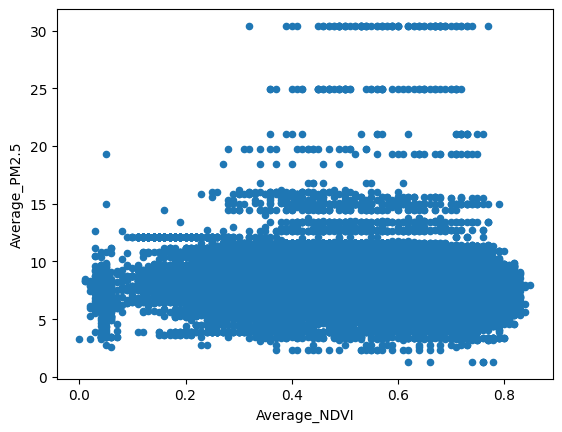

In [43]:

df.plot.scatter(x="Average_NDVI", y ="Average_PM2.5")
print(df['Average_NDVI'].corr(df['Average_PM2.5']))

np.float64(0.10385367850169594)

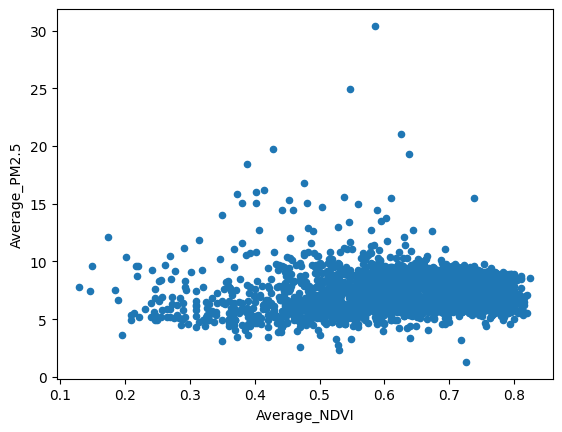

In [52]:
df["Average_PM2.5"] = df["Average_PM2.5"].astype(float)
df_county = df.groupby("CountyFIPS").agg("mean", numeric_only=True).reset_index()
df_county.plot.scatter(x="Average_NDVI", y ="Average_PM2.5")
df_county['Average_NDVI'].corr(df_county['Average_PM2.5'])

np.float64(-0.12380633665275055)

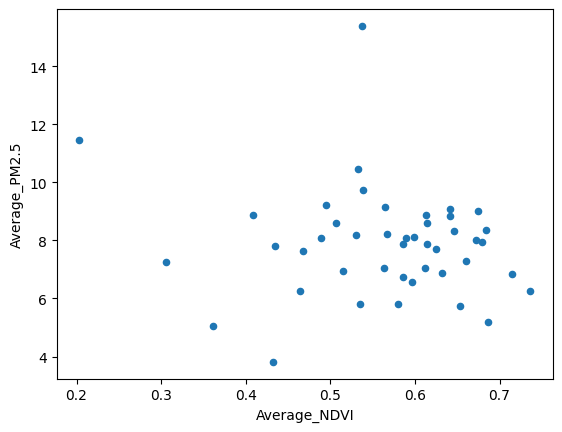

In [46]:

df_state = df.groupby("State_x").agg("mean", numeric_only=True).reset_index()
df_state.plot.scatter(x="Average_NDVI", y ="Average_PM2.5")
df_state['Average_NDVI'].corr(df_state['Average_PM2.5'])

In [49]:
# same-year, CONUS only
df2 = df.query("State_x not in ['Alaska','Hawaii']").copy()

# Spearman
df2[["Average_NDVI","Average_PM2.5"]].corr(method="spearman")

# log PM, winsorize 1%
import numpy as np
q1,q99 = df2["Average_PM2.5"].quantile([.01,.99])
pm = df2["Average_PM2.5"].clip(q1,q99)
df2["log_pm"] = np.log(pm)
df2[["Average_NDVI","log_pm"]].corr(method="pearson")

# stratify by metro/non-metro (if you have a flag `is_metro`)
# df2.groupby("is_metro")[["Average_NDVI","Average_PM2.5"]].corr().loc[(slice(None),"Average_NDVI"),"Average_PM2.5"]

# add density control (simple OLS)


,Average_NDVI,log_pm
Average_NDVI,1.000000,-0.195996
log_pm,-0.195996,1.000000
